**Alumno:** César Emilio García Ávalos

**Actividad:** M3_AG1_Países extremos en la implantación de Facebook

In [69]:
library(readr)
library(tidyr)
library(dplyr)
library(ggplot2)
install.packages("stargazer")
install.packages("MASS")
install.packages("mice")
library(stargazer)
ruta <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/fb_long2.txt"
datos <- read.csv(ruta, sep = ";")
str(datos)
head(datos)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	156 obs. of  5 variables:
 $ pais_r          : chr  "Algeria" "Argentina" "Australia" "Austria" ...
 $ Facebook_num    : int  928100 10542040 9009660 2084840 139460 226480 854520 3505920 4757200 15497900 ...
 $ Internet_por_num: chr  "12,5" "45" "76" "75,17" ...
 $ poblacion_num   : int  35977455 40788453 22031750 8363404 354942 1240860 147575430 10895586 195713635 34004889 ...
 $ anyo            : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...


,pais_r,Facebook_num,Internet_por_num,poblacion_num,anyo
,<chr>,<int>,<chr>,<int>,<int>
1,Algeria,928100,"12,5",35977455,2010
2,Argentina,10542040,45,40788453,2010
3,Australia,9009660,76,22031750,2010
4,Austria,2084840,"75,17",8363404,2010
5,"Bahamas, The",139460,43,354942,2010
6,Bahrain,226480,55,1240860,2010


In [70]:
datos$Internet_por_num <- as.numeric(gsub(",",".",datos$Internet_por_num))
estadisticos <- summary(datos)
estadisticos

    pais_r           Facebook_num       Internet_por_num poblacion_num      
 Length:156         Min.   :    26840   Min.   : 0.75    Min.   :3.180e+05  
 Class :character   1st Qu.:  1402950   1st Qu.:40.58    1st Qu.:6.806e+06  
 Mode  :character   Median :  3543690   Median :66.00    Median :2.315e+07  
                    Mean   : 15175281   Mean   :60.80    Mean   :7.855e+07  
                    3rd Qu.: 14150075   3rd Qu.:83.55    3rd Qu.:6.333e+07  
                    Max.   :300000000   Max.   :99.65    Max.   :1.393e+09  
                                        NA's   :1                           
      anyo     
 Min.   :2010  
 1st Qu.:2010  
 Median :2014  
 Mean   :2014  
 3rd Qu.:2018  
 Max.   :2018  
               

In [71]:
datos$Facebook_por_Internet <- (datos$Facebook_num / datos$Internet_por_num) * 100
summary(datos$Facebook_por_Internet)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
   168805   2718323   6419753  29332560  24337829 882352941         1 

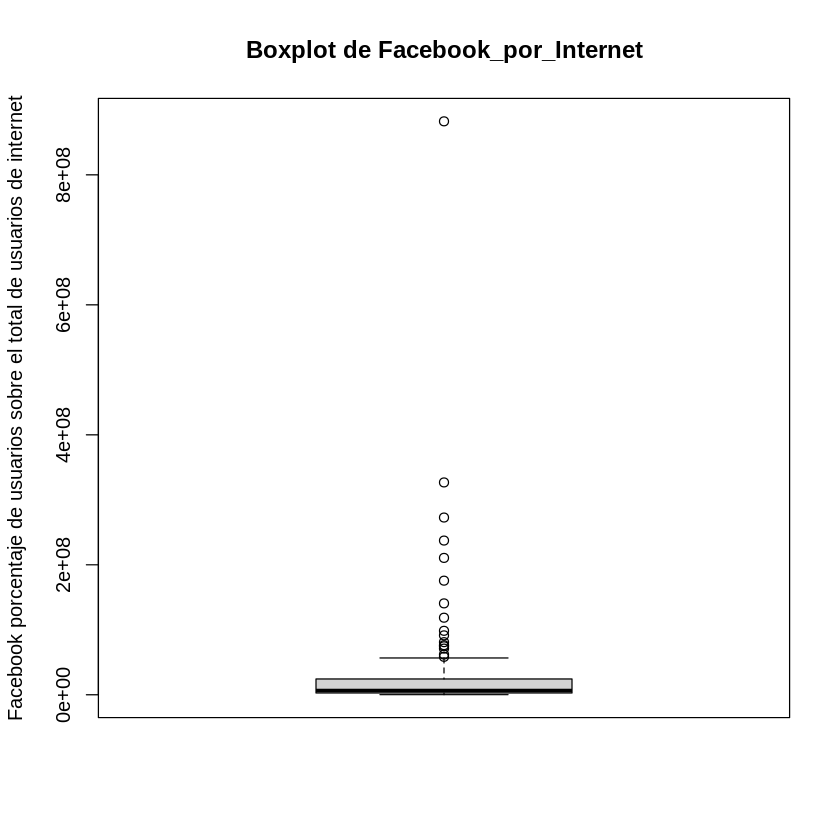

In [72]:
boxplot(datos$Facebook_por_Internet,
        main = "Boxplot de Facebook_por_Internet",
        ylab = "Facebook porcentaje de usuarios sobre el total de usuarios de internet")

Se observa en el boxplot la presencia de datos atípicos para ciertos paises

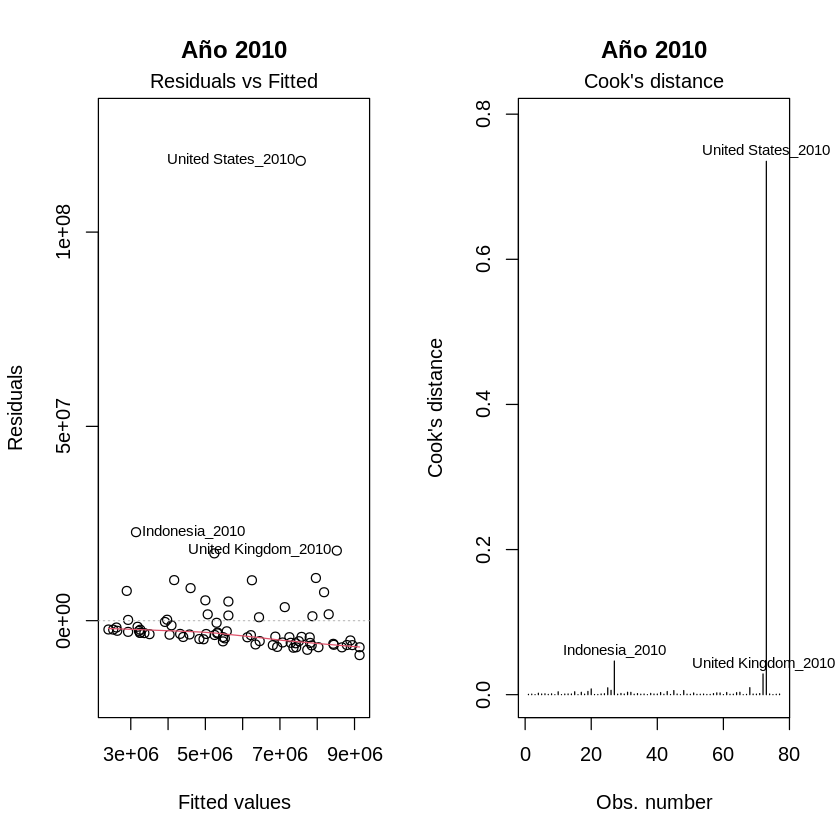

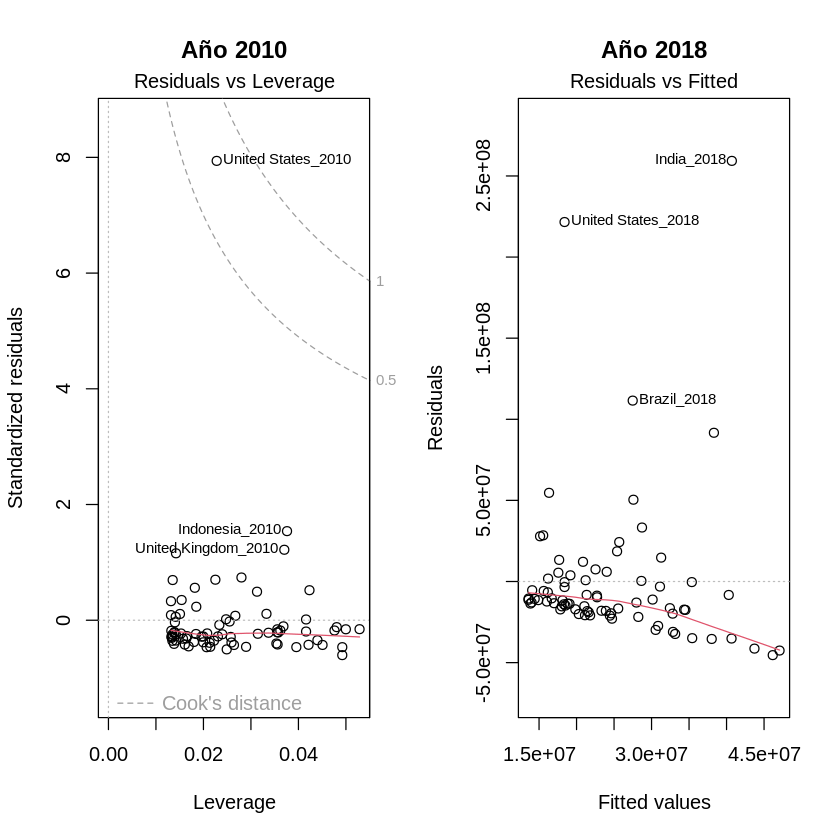

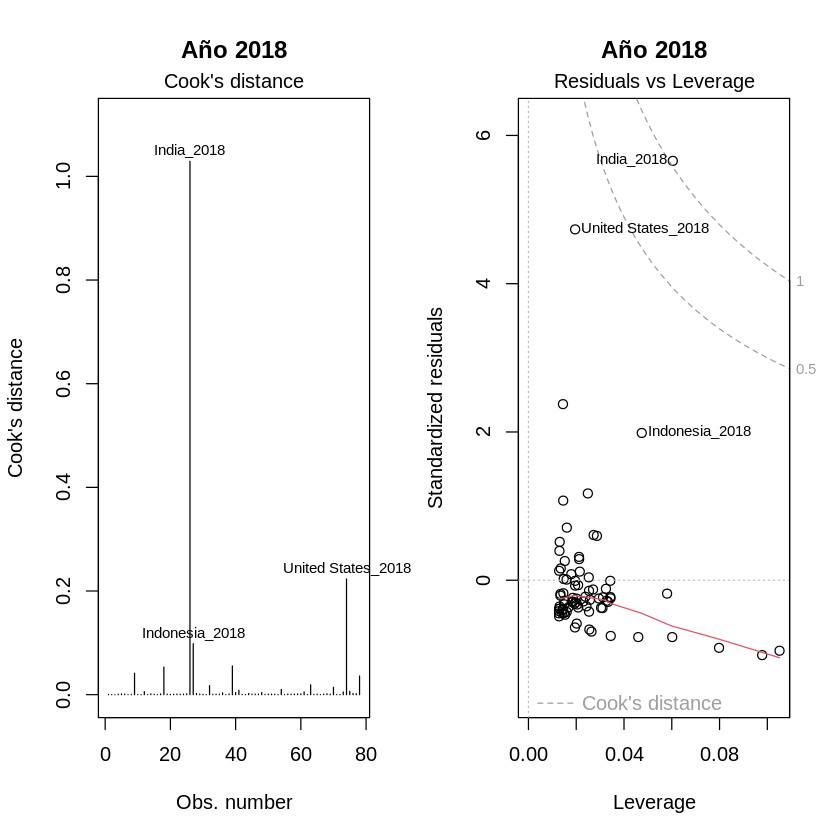

In [73]:
rownames(datos) <- paste(datos$pais_r, datos$anyo, sep = "_")

modelo_2010 <- lm(Facebook_num ~ Internet_por_num, data = datos[datos$anyo == 2010,])
modelo_2018 <- lm(Facebook_num ~ Internet_por_num, data = datos[datos$anyo == 2018,])

par(mfrow=c(1,2))  # Configurar la disposición de los gráficos

plot(modelo_2010, 1, main = "Año 2010")
plot(modelo_2010, 4, main = "Año 2010")
plot(modelo_2010, 5, main = "Año 2010")
plot(modelo_2018, 1, main = "Año 2018")
plot(modelo_2018, 4, main = "Año 2018")
plot(modelo_2018, 5, main = "Año 2018")

In [74]:
cooks_distance_2010 <- cooks.distance(modelo_2010)
outliers_2010 <- which(cooks_distance_2010 > 1)

cooks_distance_2018 <- cooks.distance(modelo_2018)
outliers_2018 <- which(cooks_distance_2018 > 1)

if (length(outliers_2010) > 0) {
  cat("Se observan posibles outliers en 2010 para los siguientes países:", rownames(datos[datos$anyo == 2010,])[outliers_2010], "\n")
} else {
  cat("No se observan outliers en 2010.\n")
}

if (length(outliers_2018) > 0) {
  cat("Se observan posibles outliers en 2018 para los siguientes países:", rownames(datos[datos$anyo == 2018,])[outliers_2018], "\n")
} else {
  cat("No se observan outliers en 2018.\n")
}

cat("\nLa presencia de outliers puede ser causada por varios factores, como errores de medición, datos incorrectos, eventos excepcionales o simplemente variabilidad natural en los datos. Es importante investigar más a fondo las observaciones identificadas como outliers para determinar la causa subyacente y considerar si deben ser excluidas del análisis o si requieren un tratamiento especial.\n")

No se observan outliers en 2010.
Se observan posibles outliers en 2018 para los siguientes países: India_2018 

La presencia de outliers puede ser causada por varios factores, como errores de medición, datos incorrectos, eventos excepcionales o simplemente variabilidad natural en los datos. Es importante investigar más a fondo las observaciones identificadas como outliers para determinar la causa subyacente y considerar si deben ser excluidas del análisis o si requieren un tratamiento especial.


In [75]:
library(MASS)
modelo_2010_rlm <- rlm(Facebook_num ~ Internet_por_num, data = datos[datos$anyo == 2010,])
modelo_2018_rlm <- rlm(Facebook_num ~ Internet_por_num, data = datos[datos$anyo == 2018,])

library(stargazer)

stargazer(modelo_2010, modelo_2010_rlm,
          type = "text", title = "Comparación de modelos 2010",
          column.labels = c("LM", "RLM"),
          star.cutoffs = c(0.05, 0.01, 0.001))

stargazer(modelo_2018, modelo_2018_rlm,
          type = "text", title = "Comparación de modelos 2018",
          column.labels = c("LM", "RLM"),
          star.cutoffs = c(0.05, 0.01, 0.001))


Comparación de modelos 2010
                                     Dependent variable:       
                              ---------------------------------
                                        Facebook_num           
                                     OLS             robust    
                                                     linear    
                                      LM              RLM      
                                     (1)              (2)      
---------------------------------------------------------------
Internet_por_num                  72,690.040       19,830.740  
                                 (63,480.420)     (11,385.790) 
                                                               
Constant                        2,346,462.000    1,539,308.000*
                               (3,507,880.000)   (629,170.200) 
                                                               
---------------------------------------------------------------
Observation

En la comparación de modelos 2010 y 2018 utilizando tanto el modelo lineal ordinario (OLS) como el modelo lineal robusto (RLM), observamos algunos cambios en los coeficientes del modelo entre los dos enfoques.

**En el modelo de 2010:**

El coeficiente para Internet_por_num es 72,690.040 en el modelo OLS y 19,830.740 en el modelo RLM. Esto indica que la relación entre Facebook_num e Internet_por_num es significativa en ambos modelos, pero el coeficiente estimado es mucho más bajo en el modelo RLM.
La constante también muestra una diferencia entre los dos modelos, siendo más baja en el modelo RLM que en el modelo OLS.

**En el modelo de 2018:**

Nuevamente, observamos una diferencia notable en el coeficiente para Internet_por_num entre los dos modelos. En el modelo OLS es -413,076.700 mientras que en el modelo RLM es -83,022.970. Esta diferencia indica que la relación entre Facebook_num e Internet_por_num es significativa en ambos modelos, pero el coeficiente estimado es mucho más bajo en el modelo RLM.
Al igual que en el modelo de 2010, la constante también es más baja en el modelo RLM que en el modelo OLS.
En resumen, en ambos años, el coeficiente para Internet_por_num es considerablemente menor en el modelo RLM en comparación con el modelo OLS, lo que indica que el modelo RLM está dando menos peso a esta variable independiente en la predicción de Facebook_num. Esto puede ser atribuible a la capacidad del modelo RLM para manejar valores atípicos de manera más robusta, lo que puede influir en la estimación de los coeficientes y en la interpretación del modelo.

In [76]:
library(mice)
imputed_data <- mice(datos, m = 5, method = "mean", seed = 123)
complete_data <- complete(imputed_data)
summary(complete_data)


 iter imp variable
  1   1  Internet_por_num  Facebook_por_Internet
  1   2  Internet_por_num  Facebook_por_Internet
  1   3  Internet_por_num  Facebook_por_Internet
  1   4  Internet_por_num  Facebook_por_Internet
  1   5  Internet_por_num  Facebook_por_Internet
  2   1  Internet_por_num  Facebook_por_Internet
  2   2  Internet_por_num  Facebook_por_Internet
  2   3  Internet_por_num  Facebook_por_Internet
  2   4  Internet_por_num  Facebook_por_Internet
  2   5  Internet_por_num  Facebook_por_Internet
  3   1  Internet_por_num  Facebook_por_Internet
  3   2  Internet_por_num  Facebook_por_Internet
  3   3  Internet_por_num  Facebook_por_Internet
  3   4  Internet_por_num  Facebook_por_Internet
  3   5  Internet_por_num  Facebook_por_Internet
  4   1  Internet_por_num  Facebook_por_Internet
  4   2  Internet_por_num  Facebook_por_Internet
  4   3  Internet_por_num  Facebook_por_Internet
  4   4  Internet_por_num  Facebook_por_Internet
  4   5  Internet_por_num  Facebook_por_Internet


Warning message:
“Number of logged events: 1”


    pais_r           Facebook_num       Internet_por_num poblacion_num      
 Length:156         Min.   :    26840   Min.   : 0.75    Min.   :3.180e+05  
 Class :character   1st Qu.:  1402950   1st Qu.:40.61    1st Qu.:6.806e+06  
 Mode  :character   Median :  3543690   Median :65.90    Median :2.315e+07  
                    Mean   : 15175281   Mean   :60.80    Mean   :7.855e+07  
                    3rd Qu.: 14150075   3rd Qu.:83.47    3rd Qu.:6.333e+07  
                    Max.   :300000000   Max.   :99.65    Max.   :1.393e+09  
      anyo      Facebook_por_Internet
 Min.   :2010   Min.   :   168805    
 1st Qu.:2010   1st Qu.:  2745912    
 Median :2014   Median :  6628525    
 Mean   :2014   Mean   : 29332560    
 3rd Qu.:2018   3rd Qu.: 24489370    
 Max.   :2018   Max.   :882352941    

In [79]:
datosTaiwan <- filter(complete_data, complete_data$pais_r == "Taiwan")
datosTaiwan

,pais_r,Facebook_num,Internet_por_num,poblacion_num,anyo,Facebook_por_Internet
,<chr>,<int>,<dbl>,<int>,<int>,<dbl>
Taiwan_2010,Taiwan,6745160,60.79698,23140948,2010,29332560
Taiwan_2018,Taiwan,18000000,88.00000,23580080,2018,20454545
